# 1) Import Libraries and load dataset


In [1]:
import numpy as np
import pandas as pd


# ignore all warning messages
import warnings
warnings.filterwarnings('ignore')

 #### Load wine quality dataset (Link : https://archive.ics.uci.edu/ml/datasets/wine+quality)

In [2]:
data = pd.read_csv('winequality-red.csv')

#### Dataset Attribute Information:

> For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests): <br> 
1 - fixed acidity <br> 
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>

>Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) <br>

# 2) Basic of panda dataframe

#### Let's view the top 5 rows of the dataset using the head() function.

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### We can also view the bottom 5 rows of the dataset using the tail() function.

In [4]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


#### When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. 
> We can do this by using the info() method. This method can be used to get a short summary of the dataframe.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### replace space in feature names with '_'

In [7]:
data.columns = [c.replace(' ', '_') for c in data.columns]

In [8]:
data.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


#### Similarly, to get the list of indices we use the .index instance variables.

In [9]:
data.index

RangeIndex(start=0, stop=1599, step=1)

#### To view the dimensions of the dataframe, we use the shape instance variable of it.

In [10]:
# size of dataframe (rows, columns)
data.shape    

(1599, 12)

#### Let's clean the dataset ::
>  To add column <br>
    1) new column is combination of two columns, we will use apply method <br>
    2) new column is independent, we can use insert method

> To remove a few unnecessary columns. We can use pandas drop() method 

In [11]:
def get_total(h,w):
    return h+w

In [12]:
data['total_acidity'] = data.apply(lambda row: get_total(row.fixed_acidity,row.volatile_acidity), axis=1)
data.head(2)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68


In [13]:
data.insert(0, 'Id', range(1, 1 + len(data)))
data.head(2)

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,total_acidity
0,1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10
1,2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68


In [14]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
data.drop(['total_acidity'], axis=1, inplace=True)
data.head(2)

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


##### We can check to see how many null objects we have in the dataset as follows:



In [15]:
data.isnull().sum()

Id                      0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Finally, let's view a quick summary of each column in our dataframe using the describe() method.


In [16]:
data.describe()

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,800.000000,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,461.735855,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,1.000000,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,400.500000,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,800.000000,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,1199.500000,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,1599.000000,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Select Column

**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

```python
    df.column_name               # returns series
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']                  # returns series
```

```python
    df[['column 1', 'column 2']]  # returns dataframe
```


#### Example: Let's try filtering on the list fixed_acidity

In [17]:
data.fixed_acidity             # returns a series

0        7.4
1        7.8
2        7.8
3       11.2
4        7.4
        ... 
1594     6.2
1595     5.9
1596     6.3
1597     5.9
1598     6.0
Name: fixed_acidity, Length: 1599, dtype: float64

### Select Row

There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```

In [18]:
data.head()

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# 1. the full row data (all columns)
data.loc[1]

Id                       2.0000
fixed_acidity            7.8000
volatile_acidity         0.8800
citric_acid              0.0000
residual_sugar           2.6000
chlorides                0.0980
free_sulfur_dioxide     25.0000
total_sulfur_dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Name: 1, dtype: float64

In [20]:
data.iloc[1]

Id                       2.0000
fixed_acidity            7.8000
volatile_acidity         0.8800
citric_acid              0.0000
residual_sugar           2.6000
chlorides                0.0980
free_sulfur_dioxide     25.0000
total_sulfur_dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Name: 1, dtype: float64


### This can be fixed very easily by setting the 'Id' column as the index using `set_index()` method.


In [21]:
data.set_index('Id', inplace=True)


In [22]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
data.loc[1]

fixed_acidity            7.4000
volatile_acidity         0.7000
citric_acid              0.0000
residual_sugar           1.9000
chlorides                0.0760
free_sulfur_dioxide     11.0000
total_sulfur_dioxide    34.0000
density                  0.9978
pH                       3.5100
sulphates                0.5600
alcohol                  9.4000
quality                  5.0000
Name: 1, dtype: float64

In [24]:
data.iloc[1]

fixed_acidity            7.8000
volatile_acidity         0.8800
citric_acid              0.0000
residual_sugar           2.6000
chlorides                0.0980
free_sulfur_dioxide     25.0000
total_sulfur_dioxide    67.0000
density                  0.9968
pH                       3.2000
sulphates                0.6800
alcohol                  9.8000
quality                  5.0000
Name: 2, dtype: float64

In [25]:
# Note: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()
data1 = data
data1.head()
data1.reset_index().head()

,Id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
data[data.index == 1]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
# TO get value using row and column
data.loc[1, 'fixed_acidity']

7.4

In [28]:
# TO get value using row and column position
data.iloc[0, 0]

7.4

### Filtering based on a criteria

>To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

> For example, Let's filter the dataframe to show the data with quality = 8

In [29]:
# 1. create the condition 
condition = data['quality'] == 8
print(condition)

Id
1       False
2       False
3       False
4       False
5       False
        ...  
1595    False
1596    False
1597    False
1598    False
1599    False
Name: quality, Length: 1599, dtype: bool


In [30]:
# 2. pass this condition into the dataFrame
print(data[condition].shape)
data[condition]

(18, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
268,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
279,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
391,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
441,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
456,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
482,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
496,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
499,10.7,0.35,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
589,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8


In [31]:
# we can pass multiple criteria in the same line.

data[(data['quality'] == 8) & (data['pH'] <= 3.0)]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses
# try running :
# data[data['quality'] == 8 & data['pH'] <= 3.0]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
441,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
1091,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8


In [32]:
print('data dimensions:', data.shape)
print(data.columns)
data.head(2)

data dimensions: (1599, 12)
Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
1,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


***

# 3) Visualizing Data using Python Libraries 

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# we are using the inline backend
%matplotlib inline 


import seaborn as sns
sns.set_palette('husl')

In [34]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.4.3


In [35]:
print(plt.style.available)
mpl.style.use(['seaborn']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Basic Plots

> Line Plots (single/multiple variables) <br> 
> Bar Plots <br>
> Area Plot with sub-plot example

In [36]:
# select a feature column
fixed_acidity = data['fixed_acidity'] 
fixed_acidity.head()

Id
1     7.4
2     7.8
3     7.8
4    11.2
5     7.4
Name: fixed_acidity, dtype: float64

<AxesSubplot:xlabel='Id'>

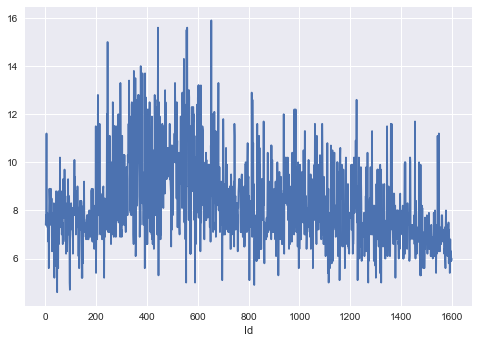

In [37]:
# Draw a plot, by default it will draw 'line' plot
fixed_acidity.plot()

Text(0, 0.5, 'fixed_acidity Intensity')

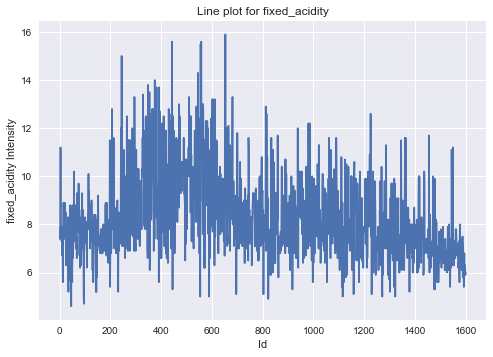

In [38]:
# Draw a plot, with title, x and y label
ax = fixed_acidity.plot()
ax.set_title("Line plot for fixed_acidity")
ax.set_xlabel("Id")
ax.set_ylabel("fixed_acidity Intensity")

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot

<AxesSubplot:xlabel='Id'>

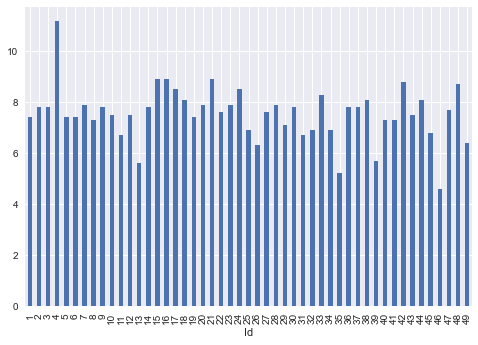

In [39]:
# Draw a bar graph with selected data index
fixed_acidity[range(1,50)].plot(kind='bar')

# Alternative approach
#dataSelect = range(1,50)
#fixed_acidity = data.loc[dataSelect, 'fixed_acidity']
#fixed_acidity.head()

<AxesSubplot:ylabel='Id'>

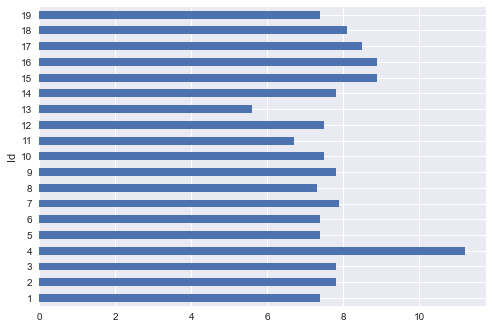

In [40]:
fixed_acidity[range(1,20)].plot(kind='barh')

<AxesSubplot:xlabel='Id'>

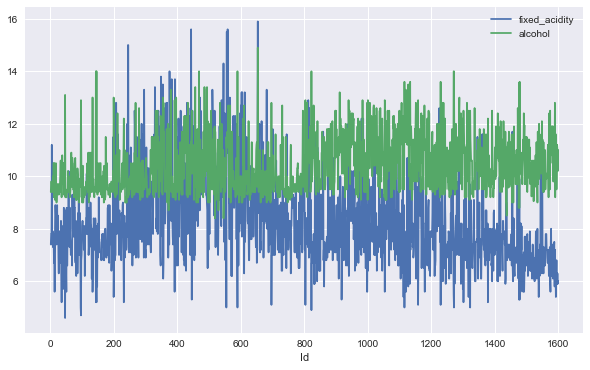

In [41]:
# line plot with multiple variables
data[['fixed_acidity','alcohol']].plot(kind='line',figsize=(10,6))

<AxesSubplot:xlabel='Id'>

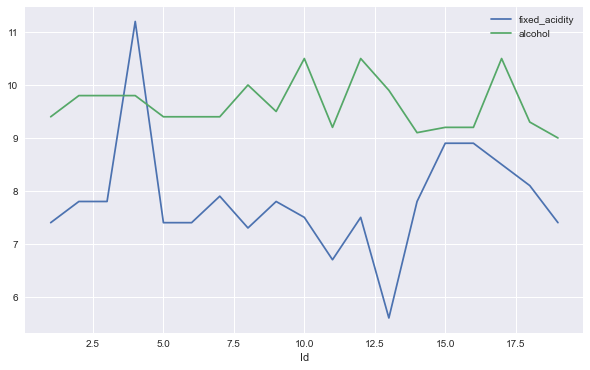

In [43]:
# line plot with multiple variables and selected index
data.loc[range(1,20),['fixed_acidity','alcohol']].plot(kind='line',figsize=(10,6))

#### **Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the line plot with the bar plot

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. 
Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```


<img src="Subplots.png" width="600" height="300">

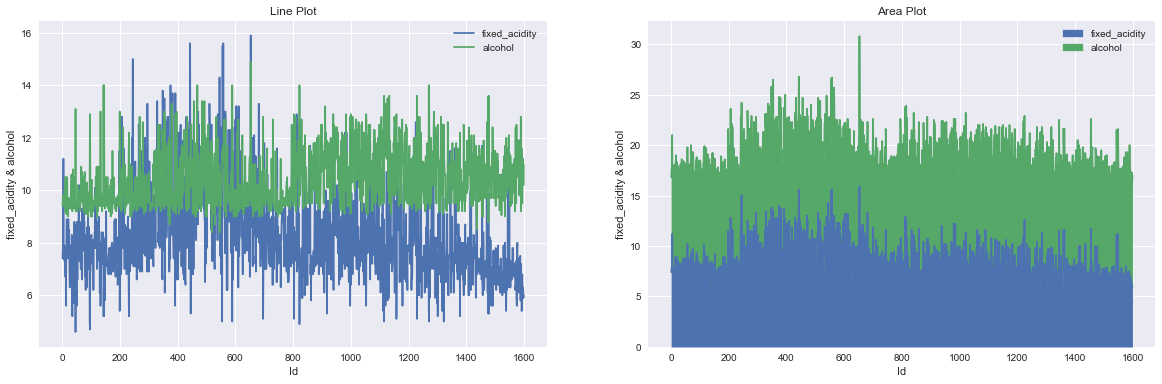

In [43]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). 

# Subplot 1: line plot
data[['fixed_acidity','alcohol']].plot(kind='line', figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Line Plot')
ax0.set_xlabel('Id')
ax0.set_ylabel('fixed_acidity & alcohol')

# Subplot 2: Area plot
data[['fixed_acidity','alcohol']].plot(kind='area', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title('Area Plot')
ax1.set_xlabel('Id')
ax1.set_ylabel('fixed_acidity & alcohol')

plt.show()

## Some Advanced Plots
> Histogram Plots (single/multiple variables) <br>
> Pie chart <br>
> Box Plot
> Scatter Plot <br>

**Question:** Compare the trend of top 5 quality data


Id                       496     1404     391       1062      1203
fixed_acidity         10.7000   7.200   5.6000   9.10000   8.60000
volatile_acidity       0.3500   0.330   0.8500   0.40000   0.42000
citric_acid            0.5300   0.330   0.0500   0.50000   0.39000
residual_sugar         2.6000   1.700   1.4000   1.80000   1.80000
chlorides              0.0700   0.061   0.0450   0.07100   0.06800
free_sulfur_dioxide    5.0000   3.000  12.0000   7.00000   6.00000
total_sulfur_dioxide  16.0000  13.000  88.0000  16.00000  12.00000
density                0.9972   0.996   0.9924   0.99462   0.99516
pH                     3.1500   3.230   3.5600   3.21000   3.35000
sulphates              0.6500   1.100   0.8200   0.69000   0.69000
alcohol               11.0000  10.000  12.9000  12.50000  11.70000
quality                8.0000   8.000   8.0000   8.00000   8.00000


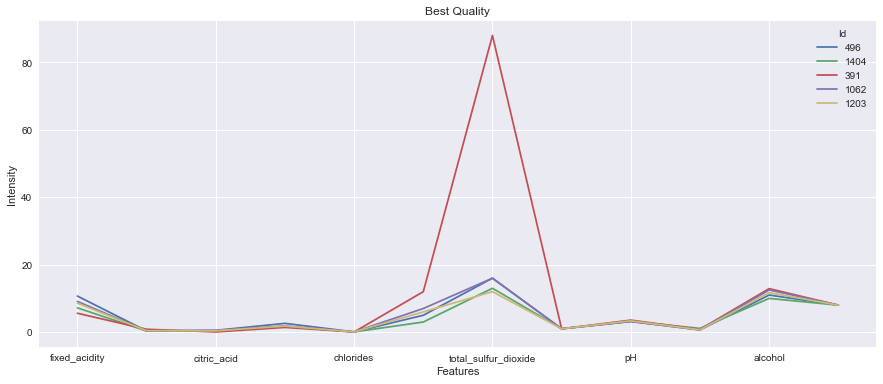

In [44]:
    #The correct answer is:    
    #Step 1: Get the dataset. 
    #We will sort on this column to get our top 5 rows using pandas sort_values() method.
    
    inplace = True # paramemter saves the changes to the original 'data' dataframe
    data.sort_values(by='quality', ascending=False, axis=0, inplace=True)

    # get the top 5 entries
    data_top5 = data.head(5)

    # transpose the dataframe
    data_top5 = data_top5.transpose()
    print(data_top5)


    #Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
    data_top5.plot(kind='line', figsize=(15, 6)) # pass a tuple (x, y) size

    plt.title('Best Quality')
    plt.ylabel('Intensity')
    plt.xlabel('Features')

    plt.show()

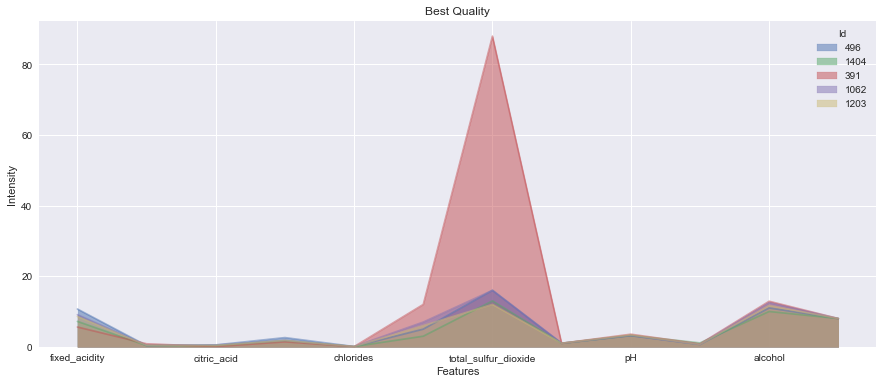

In [45]:
# let's change the index values of df_top5 to type integer for plotting
data_top5.plot(kind='area',
             stacked=False,
             figsize=(15, 6))  # pass a tuple (x, y) size

plt.title('Best Quality')
plt.ylabel('Intensity')
plt.xlabel('Features')

plt.show()

**Question**: Compare the trend of least 5 quality data

Id                       691       1479      900       1300      833 
fixed_acidity          7.4000   7.10000   8.30000   7.60000  10.40000
volatile_acidity       1.1850   0.87500   1.02000   1.58000   0.44000
citric_acid            0.0000   0.05000   0.02000   0.00000   0.42000
residual_sugar         4.2500   5.70000   3.40000   2.10000   1.50000
chlorides              0.0970   0.08200   0.08400   0.13700   0.14500
free_sulfur_dioxide    5.0000   3.00000   6.00000   5.00000  34.00000
total_sulfur_dioxide  14.0000  14.00000  11.00000   9.00000  48.00000
density                0.9966   0.99808   0.99892   0.99476   0.99832
pH                     3.6300   3.40000   3.48000   3.50000   3.38000
sulphates              0.5400   0.52000   0.49000   0.40000   0.86000
alcohol               10.7000  10.20000  11.00000  10.90000   9.90000
quality                3.0000   3.00000   3.00000   3.00000   3.00000


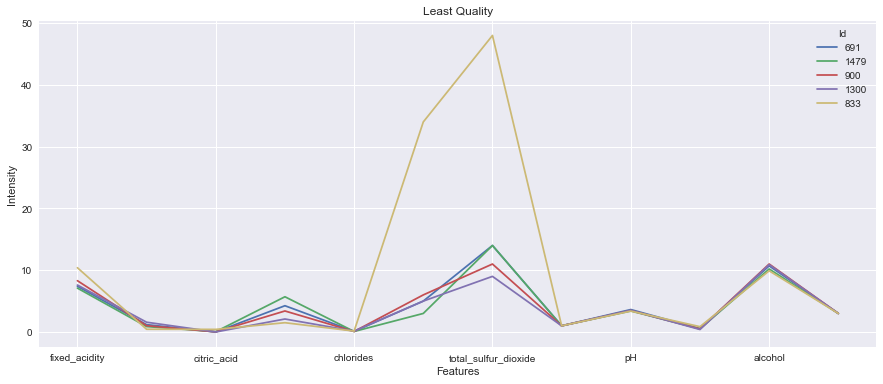

In [46]:
    data_least5 = data.tail(5)
    # transpose the dataframe
    data_least5 = data_least5.transpose()
    print(data_least5)


    #Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
    data_least5.plot(kind='line', figsize=(15, 6)) # pass a tuple (x, y) size

    plt.title('Least Quality')
    plt.ylabel('Intensity')
    plt.xlabel('Features')

    plt.show()

# Histograms<a id="8"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


In [47]:
# let's quickly view the fixed_acidity data
data['fixed_acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed_acidity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

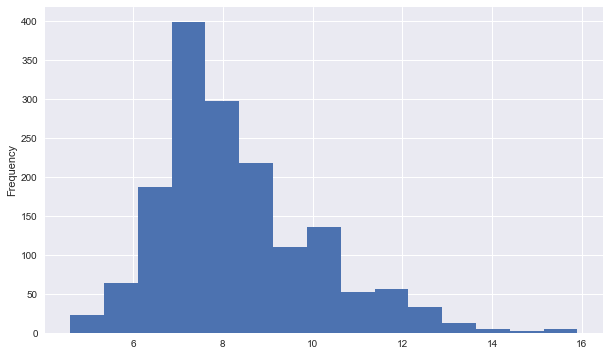

In [48]:
# plot histogram with single variables
# default bins= 10
data['fixed_acidity'].plot(kind='hist',figsize=(10,6),bins=15)

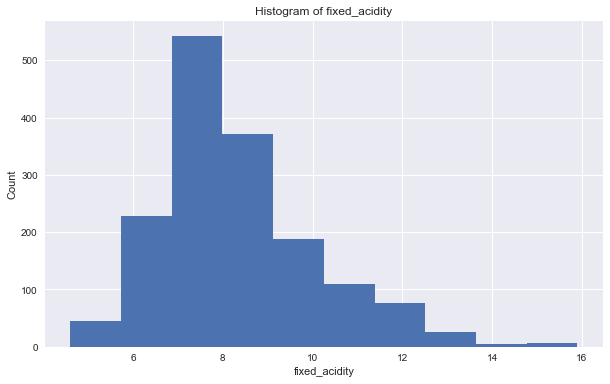

In [49]:
# plot histogram with single variables
data['fixed_acidity'].plot(kind='hist',figsize=(10,6))

# add a title to the histogram
plt.title('Histogram of fixed_acidity')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('fixed_acidity')

plt.show()

In [50]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(data['fixed_acidity'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 45 229 542 371 188 110  76  26   5   7]
[ 4.6   5.73  6.86  7.99  9.12 10.25 11.38 12.51 13.64 14.77 15.9 ]


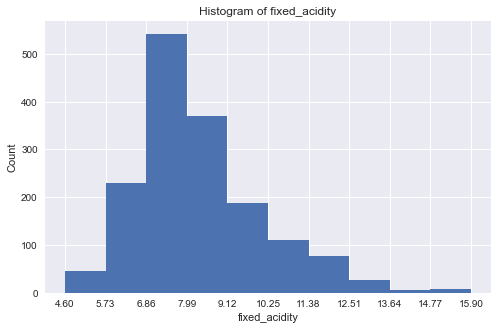

In [51]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data['fixed_acidity'])

data['fixed_acidity'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

# add a title to the histogram
plt.title('Histogram of fixed_acidity')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('fixed_acidity')

plt.show()

<AxesSubplot:ylabel='Frequency'>

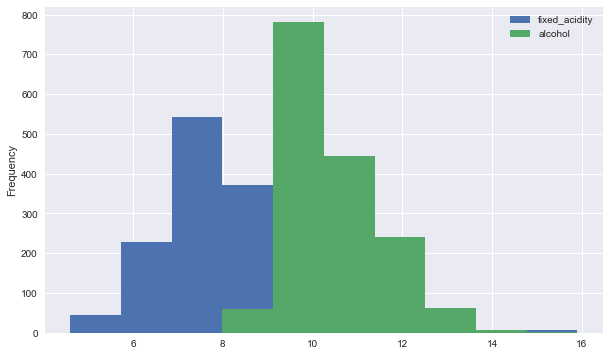

In [52]:
# plot histogram with multiple variables
data[['fixed_acidity','alcohol']].plot(kind='hist',figsize=(10,6))

<AxesSubplot:ylabel='Frequency'>

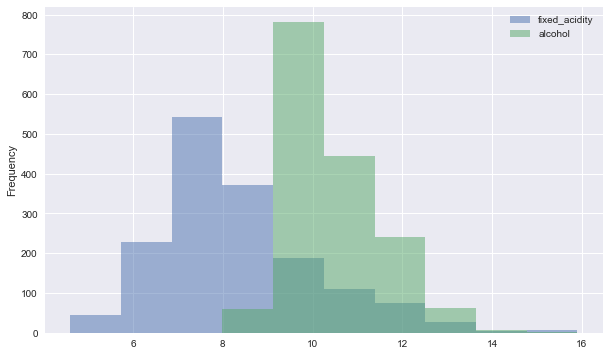

In [53]:
# plot histogram with multiple variables, with alpha = 0.5
data[['fixed_acidity','alcohol']].plot(kind='hist',figsize=(10,6),alpha=0.5)

# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the wine quality data by `quality`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="split.png" height=400 align="center">

In [54]:
# group data by quality and apply sum() function 
df_continents = data.groupby('quality', axis=0).mean()   # min(), max(), mean(), sum()
#https://pandas.pydata.org/docs/reference/groupby.html

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(data.groupby('quality', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913


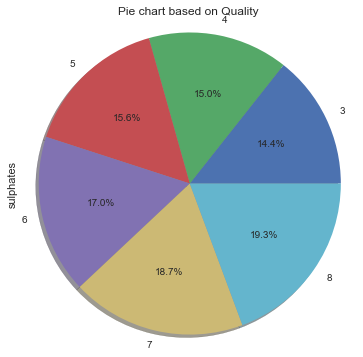

In [55]:
# autopct create %, start angle represent starting point
df_continents['sulphates'].plot(kind='pie',
                            figsize=(6, 6),
                            autopct='%.1f%%', # add in percentages
                            startangle=0,     # start angle 90° 
                            shadow=True,       # add shadow      
                            )

plt.title('Pie chart based on Quality')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


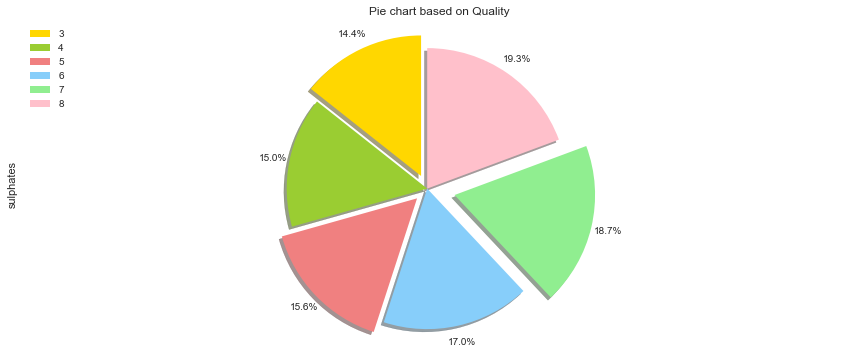

In [56]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list =  [0.1, 0, 0.1, 0, 0.2, 0] # ratio for each observation with which to offset each wedge.

df_continents['sulphates'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%0.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

plt.title('Pie chart based on Quality')
plt.axis('equal') # Sets the pie chart to look like a circle.

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

**Reference** : 
* https://en.wikipedia.org/wiki/Box_plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

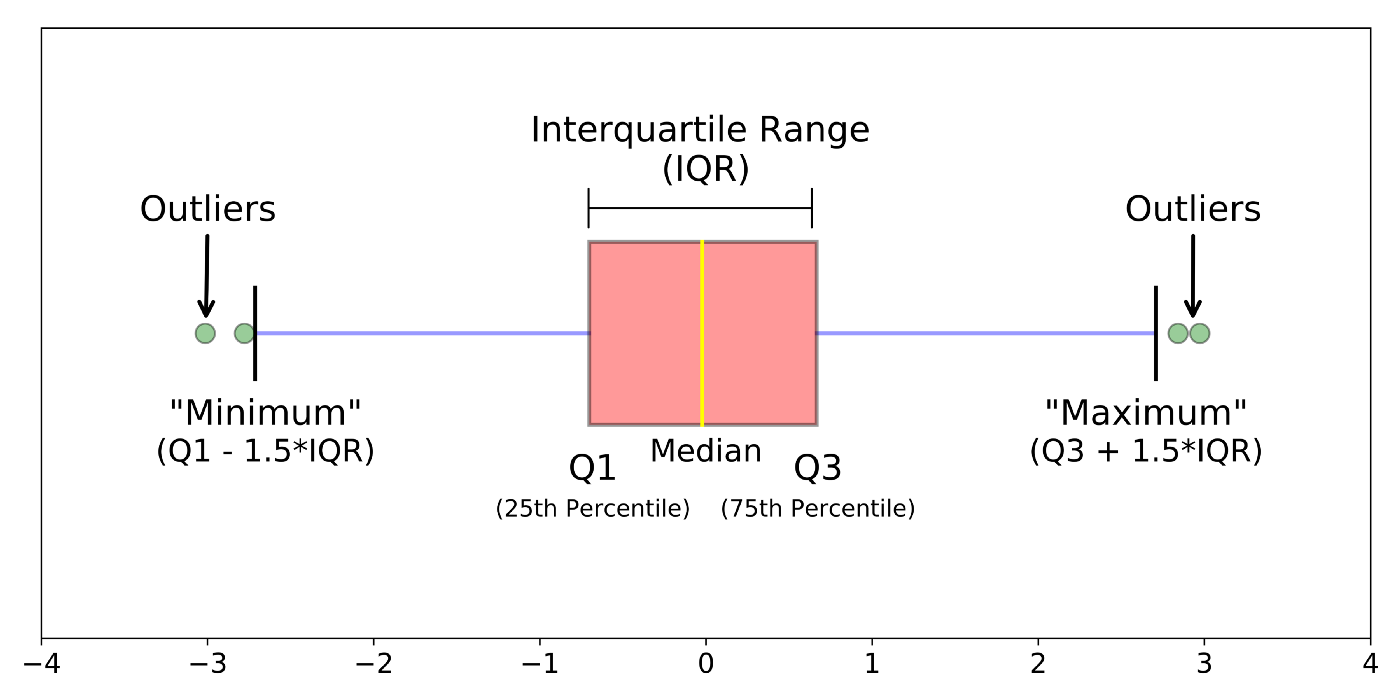

To make a `boxplot`, we can use `kind=box` in `plot` method 


In [57]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


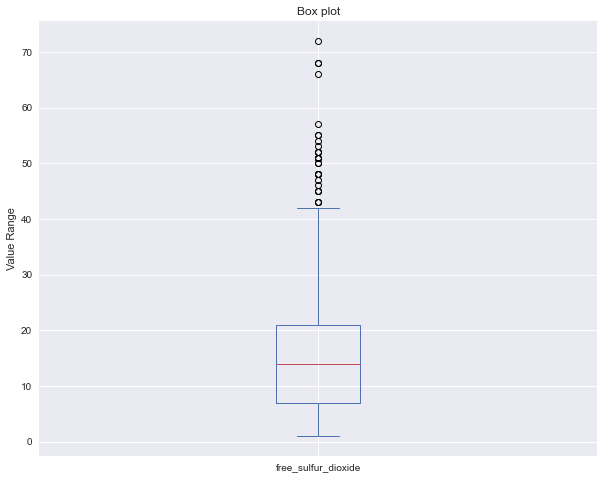

In [58]:
data['free_sulfur_dioxide'].plot(kind='box', figsize=(10, 8))

plt.title('Box plot')
plt.ylabel('Value Range')

plt.show()

<AxesSubplot:ylabel='Frequency'>

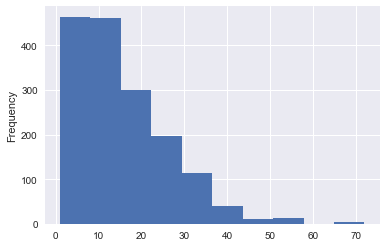

In [59]:
data['free_sulfur_dioxide'].plot(kind='hist', figsize=(6, 4))

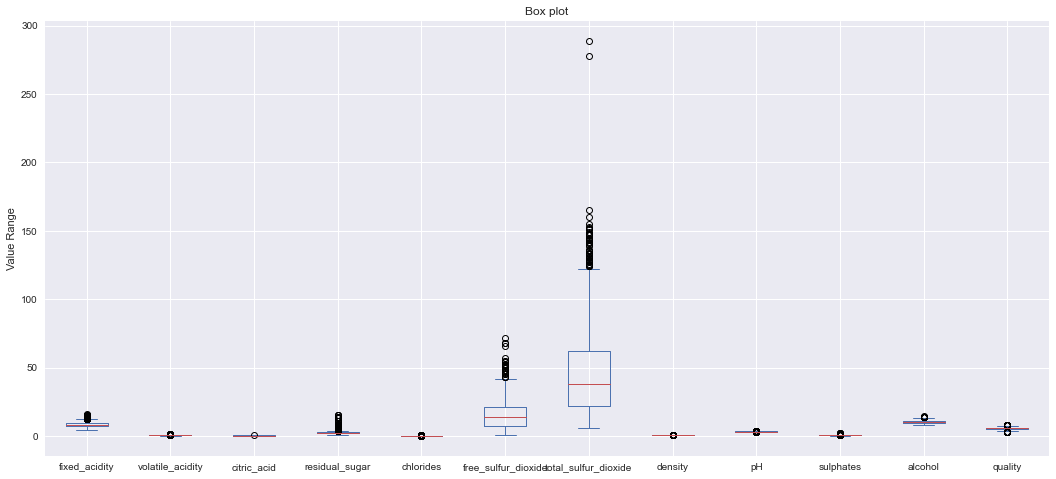

In [60]:
data.plot(kind='box', figsize=(18, 8))

plt.title('Box plot')
plt.ylabel('Value Range')

plt.show()

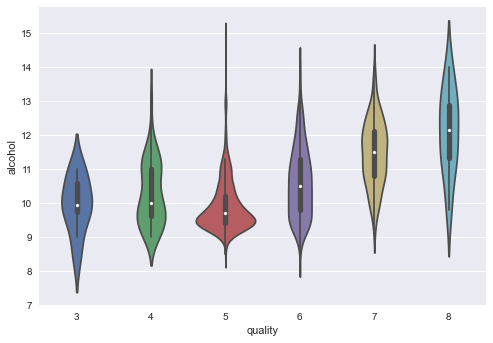

In [45]:
g = sns.violinplot(y='alcohol', x='quality', data=data)
plt.show()

Text(5, 15, 'Out-lier')

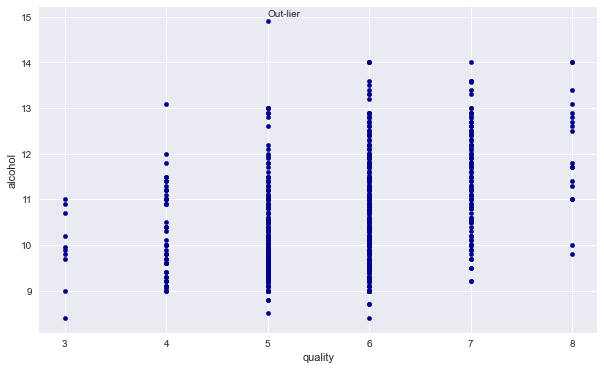

In [62]:
data.plot(kind='scatter',x='quality',y='alcohol',figsize=(10,6),color='darkblue') 
plt.text(5, 15, 'Out-lier')

Step 1: Get the dataset. Since we are expecting to use the relationship betewen `alcohol` and `quality`

Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [63]:
x = data['alcohol']      #  x-axis
y = data['sulphates']     #  y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([0.01488735, 0.50297827])

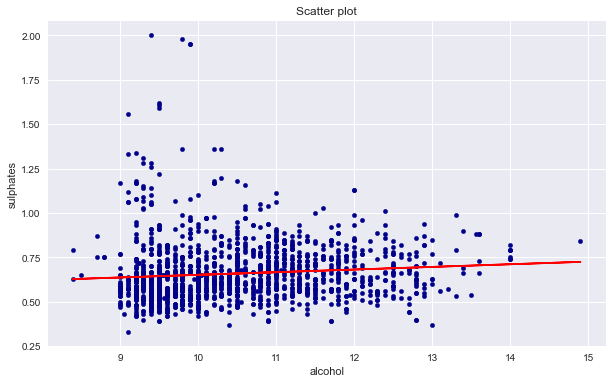

' 0.015 * alcohol + 0.503'

In [72]:
data.plot(kind='scatter', x='alcohol', y='sulphates', figsize=(10, 6), color='darkblue')

plt.title('Scatter plot')
plt.xlabel('alcohol')
plt.ylabel('sulphates')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years

plt.show()

# print out the line of best fit
' {0:.3f} * alcohol + {1:.3f}'.format(fit[0], fit[1]) 

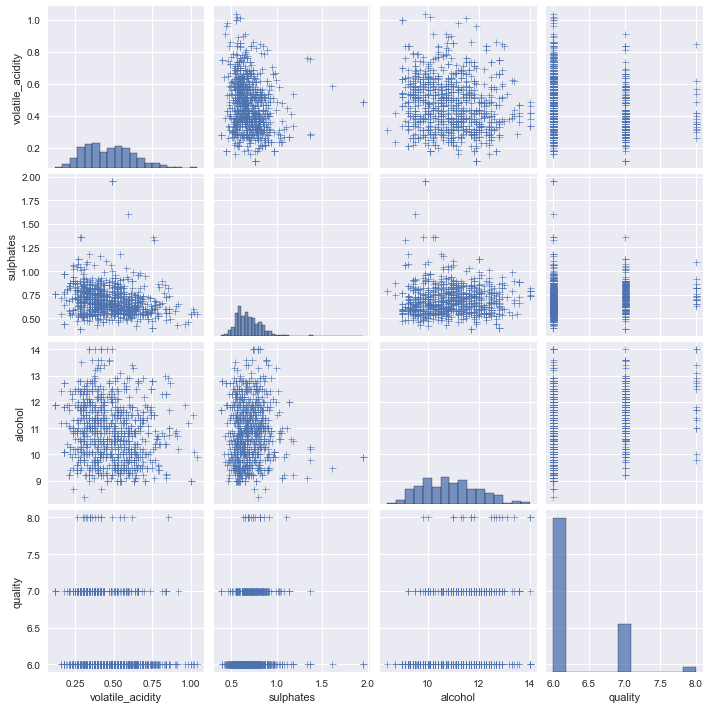

In [48]:
data1 = data[['volatile_acidity','sulphates','alcohol','quality']]
condition = data['quality'] >=6
data1 = data1[condition]
g = sns.pairplot(data1,markers='+')
plt.show()

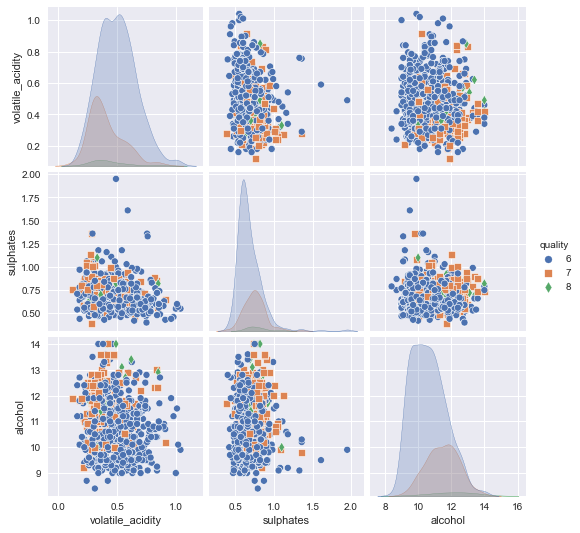

In [59]:
g = sns.pairplot(data1,hue='quality',markers = ['o','s','d'],palette='deep')
plt.show()

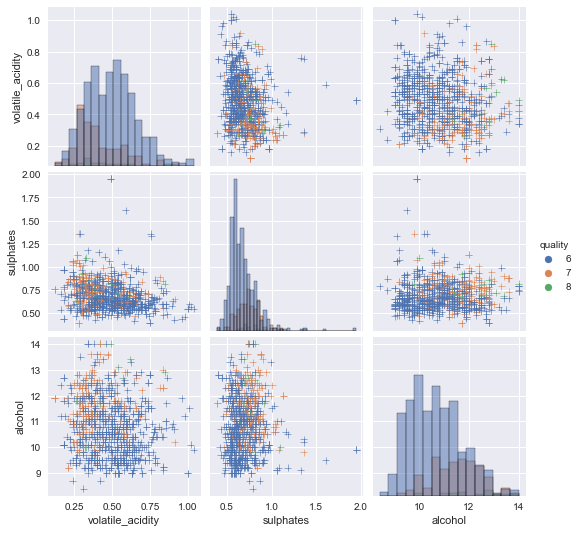

In [58]:
g = sns.pairplot(data1, hue='quality',markers='+',diag_kind="hist",palette='deep')
plt.show()

### RegPlot 


In [68]:
df_tot = pd.DataFrame(data[['alcohol','volatile_acidity']])

# view the final dataframe
df_tot

,alcohol,volatile_acidity
Id,,
496,11.0,0.350
1404,10.0,0.330
391,12.9,0.850
1062,12.5,0.400
1203,11.7,0.420
...,...,...
691,10.7,1.185
1479,10.2,0.875
900,11.0,1.020


<AxesSubplot:xlabel='alcohol', ylabel='volatile_acidity'>

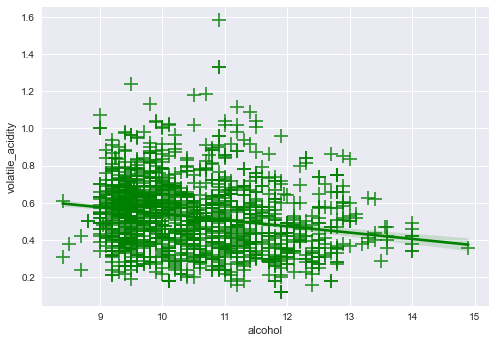

In [69]:
sns.regplot(x='alcohol', y='volatile_acidity', data=data, color='green', marker='+', scatter_kws={'s': 200})

**95% confidence interval means that if we were to take 100 different samples and compute a 95% confidence interval for each sample, then approximately 95 of the 100 confidence intervals will contain the true mean value (μ).**